# Task # 3 - To Explore Unsupervised Machine Learning

From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually. 

In [1]:
# Importing the libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets

# Load the iris dataset
iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns = iris.feature_names)
df.head() # See the first 5 rows

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [2]:
df.shape

(150, 4)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


# Missing Val 

In [4]:
#Missing Values

df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

No Missing Values

# K-Means Clustering

In [5]:
# Finding the optimum number of clusters for k-means classification

x = df.iloc[:, [0, 1, 2, 3]].values

from sklearn.cluster import KMeans
cluster_range = range(1, 11)
cluster_errors = []

for num_clusters in range(1, 11):
    kmeans = KMeans(n_clusters = num_clusters, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    cluster_errors.append(kmeans.inertia_)





In [6]:
#Create Data Frames with Clusters Errors

clusters_df = pd.DataFrame({"num_clusters":cluster_range, "cluster_errors":cluster_errors})

In [7]:
clusters_df.head()

,num_clusters,cluster_errors
0,1,681.370600
1,2,152.347952
2,3,78.851441
3,4,57.256009
4,5,46.446182


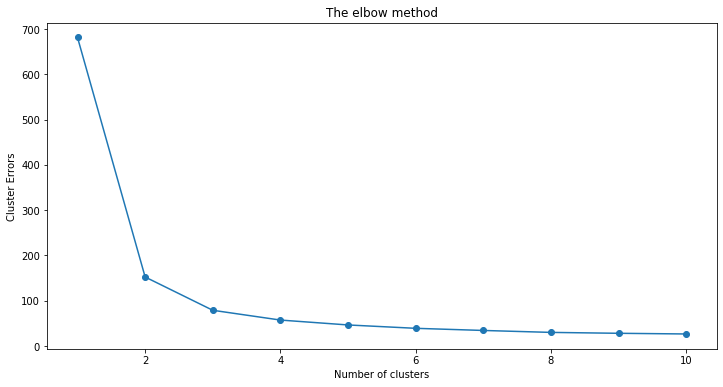

In [8]:
#Plot Line Chart to visualize number of clusters

%matplotlib inline
plt.figure(figsize = (12,6))
plt.plot(clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Cluster Errors') # Within cluster sum of squares
plt.show()

You can clearly see why it is called 'The elbow method' from the above graph, the optimum clusters is where the elbow occurs. This is when the within cluster sum of squares (WCSS) doesn't decrease significantly with every iteration.

From this we choose the number of clusters as ** '3**'.

In [9]:
# Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

# Visualization

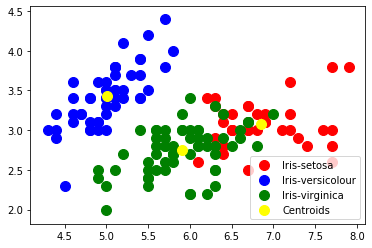

In [10]:
# Visualising the clusters - On the first two columns
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

# Thank You

-Raman Kumar